<a href="https://colab.research.google.com/github/sweyy/sweyy/blob/main/Loan_analysisk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ap_df=pd.read_csv('/content/application_data.csv')
prv_df=pd.read_csv('/content/previous_application.csv')

In [ ]:
ap_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
prv_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15.0,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11.0,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11.0,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7.0,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9.0,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print('Data Shape - application_data: ',ap_df.shape)
print('Data Shape - previous_application: ',prv_df.shape)

Data Shape - application_data:  (85375, 122)
Data Shape - previous_application:  (25559, 37)


In [ ]:
ap_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85375 entries, 0 to 85374
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DAYS

In [ ]:
prv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25559 entries, 0 to 25558
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   25559 non-null  int64  
 1   SK_ID_CURR                   25559 non-null  int64  
 2   NAME_CONTRACT_TYPE           25559 non-null  object 
 3   AMT_ANNUITY                  20191 non-null  float64
 4   AMT_APPLICATION              25559 non-null  float64
 5   AMT_CREDIT                   25559 non-null  float64
 6   AMT_DOWN_PAYMENT             12768 non-null  float64
 7   AMT_GOODS_PRICE              20149 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   25558 non-null  object 
 9   HOUR_APPR_PROCESS_START      25558 non-null  float64
 10  FLAG_LAST_APPL_PER_CONTRACT  25558 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       25558 non-null  float64
 12  RATE_DOWN_PAYMENT            12767 non-null  float64
 13  RATE_INTEREST_PR

In [ ]:
ap_df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [ ]:
prv_df.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START        float64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY         float64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                  float64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [ ]:
ap_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,85375.000000,85375.000000,85375.000000,8.537500e+04,8.537500e+04,85369.000000,8.530600e+04,85375.000000,85375.000000,85375.000000,...,85374.000000,85374.000000,85374.000000,85374.000000,73924.000000,73924.000000,73924.000000,73924.000000,73924.000000,73924.000000
mean,149509.075631,0.080586,0.416832,1.695152e+05,5.987776e+05,27081.655004,5.380553e+05,0.020843,-16033.591707,63411.505628,...,0.008351,0.000644,0.000422,0.000316,0.006723,0.007345,0.033264,0.268695,0.265773,1.890969
std,28551.803188,0.272199,0.722074,4.128845e+05,4.016291e+05,14458.157691,3.688932e+05,0.013794,4366.898094,140945.750514,...,0.091005,0.025374,0.020530,0.017781,0.086230,0.106789,0.200010,0.920143,0.613412,1.875698
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1980.000000,4.500000e+04,0.000533,-25201.000000,-17531.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,124864.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16488.000000,2.385000e+05,0.010006,-19673.000000,-2769.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,149419.000000,0.000000,0.000000,1.462500e+05,5.124465e+05,24903.000000,4.500000e+05,0.018850,-15757.000000,-1217.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,174245.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34587.000000,6.795000e+05,0.028663,-12389.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,199059.000000,1.000000,12.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7676.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,6.000000,6.000000,24.000000,8.000000,25.000000


In [ ]:
prv_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,2.555900e+04,25559.000000,20191.000000,2.555900e+04,2.555900e+04,12768.000000,2.014900e+04,25558.000000,25558.000000,12767.000000,...,88.000000,25558.000000,2.555800e+04,20190.000000,15808.000000,15808.000000,15808.000000,15808.000000,15808.000000,15808.000000
mean,1.919955e+06,278646.886302,15516.460611,1.697026e+05,1.897571e+05,6538.374868,2.153316e+05,12.497105,0.996987,0.079739,...,0.777124,-903.850262,4.846405e+02,15.620555,344787.228176,14162.156440,30884.739879,74734.870951,79566.995572,0.320218
std,5.358959e+05,102788.464820,14493.298925,2.830678e+05,3.107380e+05,16217.895347,3.030919e+05,3.335989,0.054807,0.108442,...,0.098455,787.051744,2.505593e+04,14.037940,84102.284119,73231.204507,102755.565190,148338.050935,151703.263075,0.466575
min,1.000009e+06,100007.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.424419,-2922.000000,-1.000000e+00,0.000000,-2903.000000,-2891.000000,-2800.000000,-2829.000000,-2789.000000,0.000000
25%,1.453874e+06,189482.000000,6138.517500,2.245500e+04,2.628225e+04,0.000000,4.945500e+04,10.000000,1.000000,0.000000,...,0.715645,-1346.000000,-1.000000e+00,6.000000,365243.000000,-1637.250000,-1272.000000,-1339.000000,-1294.250000,0.000000
50%,1.914900e+06,277913.000000,10894.095000,7.200000e+04,7.955550e+04,1602.000000,1.035000e+05,12.000000,1.000000,0.049805,...,0.835095,-604.000000,1.200000e+01,12.000000,365243.000000,-821.000000,-371.000000,-541.000000,-504.500000,0.000000
75%,2.385723e+06,368411.500000,19756.237500,1.800000e+05,1.978200e+05,8006.625000,2.250000e+05,15.000000,1.000000,0.108911,...,0.852537,-295.000000,1.000000e+02,18.000000,365243.000000,-411.000000,108.000000,-84.000000,-54.000000,1.000000
max,2.845367e+06,456254.000000,210115.485000,3.150000e+06,4.104351e+06,509850.000000,3.150000e+06,23.000000,1.000000,0.944776,...,0.867336,-2.000000,4.000000e+06,60.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


Identifying missing values





In [ ]:
prv_df.isna().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
NAME_CONTRACT_TYPE                 0
AMT_ANNUITY                     5368
AMT_APPLICATION                    0
AMT_CREDIT                         0
AMT_DOWN_PAYMENT               12791
AMT_GOODS_PRICE                 5410
WEEKDAY_APPR_PROCESS_START         1
HOUR_APPR_PROCESS_START            1
FLAG_LAST_APPL_PER_CONTRACT        1
NFLAG_LAST_APPL_IN_DAY             1
RATE_DOWN_PAYMENT              12792
RATE_INTEREST_PRIMARY          25471
RATE_INTEREST_PRIVILEGED       25471
NAME_CASH_LOAN_PURPOSE             1
NAME_CONTRACT_STATUS               1
DAYS_DECISION                      1
NAME_PAYMENT_TYPE                  1
CODE_REJECT_REASON                 1
NAME_TYPE_SUITE                12387
NAME_CLIENT_TYPE                   1
NAME_GOODS_CATEGORY                1
NAME_PORTFOLIO                     1
NAME_PRODUCT_TYPE                  1
CHANNEL_TYPE                       1
SELLERPLACE_AREA                   1
N

In [ ]:
null_count=round(100*(prv_df.isnull().sum()/len(prv_df.index)),2)
null_count

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    21.00
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               50.04
AMT_GOODS_PRICE                21.17
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              50.05
RATE_INTEREST_PRIMARY          99.66
RATE_INTEREST_PRIVILEGED       99.66
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                48.46
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [ ]:
null_count=null_count[null_count>=50]
null_count

AMT_DOWN_PAYMENT            50.04
RATE_DOWN_PAYMENT           50.05
RATE_INTEREST_PRIMARY       99.66
RATE_INTEREST_PRIVILEGED    99.66
dtype: float64

In [ ]:
len(null_count)

4

Removing those 4 columns which have missing values more than 50%.

In [ ]:
cols_dropped=([null_count[null_count >=50.00].index])
prv_df.drop(labels=cols_dropped[0],axis=1,inplace=True)

In [ ]:
prv_df.shape

(25559, 33)

Checking whether the missing values are more than 50%

In [ ]:
100*(prv_df.isnull().sum()/len(prv_df.index))

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    21.002387
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_GOODS_PRICE                21.166712
WEEKDAY_APPR_PROCESS_START      0.003913
HOUR_APPR_PROCESS_START         0.003913
FLAG_LAST_APPL_PER_CONTRACT     0.003913
NFLAG_LAST_APPL_IN_DAY          0.003913
NAME_CASH_LOAN_PURPOSE          0.003913
NAME_CONTRACT_STATUS            0.003913
DAYS_DECISION                   0.003913
NAME_PAYMENT_TYPE               0.003913
CODE_REJECT_REASON              0.003913
NAME_TYPE_SUITE                48.464337
NAME_CLIENT_TYPE                0.003913
NAME_GOODS_CATEGORY             0.003913
NAME_PORTFOLIO                  0.003913
NAME_PRODUCT_TYPE               0.003913
CHANNEL_TYPE                    0.003913
SELLERPLACE_AREA                0.003913
NAME_SELLER_INDUSTRY            0.003913
CNT_PAYMENT     

In [ ]:
prv_df=prv_df.dropna()

In [ ]:
prv_df.isna().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE                0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
DAYS_FIRST_DRAWING             0
DAYS_FIRST_DUE                 0
DAYS_LAST_DUE_1ST_VERSION      0
DAYS_LAST_

In [ ]:
ap_df.duplicated().sum()

0

In [ ]:
prv_df.duplicated().sum()

0

In [ ]:
ap_df.describe(include="all")

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,85375.000000,85375.000000,85375,85375,85375,85375,85375.000000,8.537500e+04,8.537500e+04,85369.000000,...,85374.000000,85374.000000,85374.000000,85374.000000,73924.000000,73924.000000,73924.000000,73924.000000,73924.000000,73924.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,77300,56218,56339,59207,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,149509.075631,0.080586,NaN,NaN,NaN,NaN,0.416832,1.695152e+05,5.987776e+05,27081.655004,...,0.008351,0.000644,0.000422,0.000316,0.006723,0.007345,0.033264,0.268695,0.265773,1.890969
std,28551.803188,0.272199,NaN,NaN,NaN,NaN,0.722074,4.128845e+05,4.016291e+05,14458.157691,...,0.091005,0.025374,0.020530,0.017781,0.086230,0.106789,0.200010,0.920143,0.613412,1.875698
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1980.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,124864.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16488.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,149419.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.462500e+05,5.124465e+05,24903.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,174245.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34587.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


Handling Outliers

In [ ]:
ap_df.AMT_ANNUITY.describe()

count     85369.000000
mean      27081.655004
std       14458.157691
min        1980.000000
25%       16488.000000
50%       24903.000000
75%       34587.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

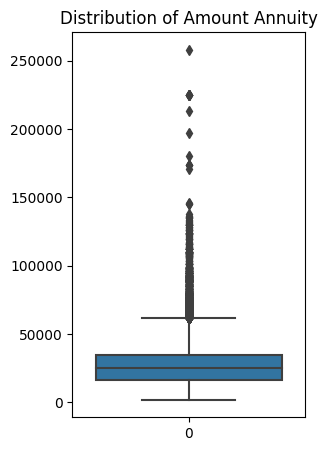

In [ ]:
plt.figure(figsize=(3,5))
sns.boxplot(ap_df.AMT_ANNUITY)
plt.title('Distribution of Amount Annuity')
plt.show()

In [ ]:
ap_df.AMT_INCOME_TOTAL.describe()

count    8.537500e+04
mean     1.695152e+05
std      4.128845e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.462500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

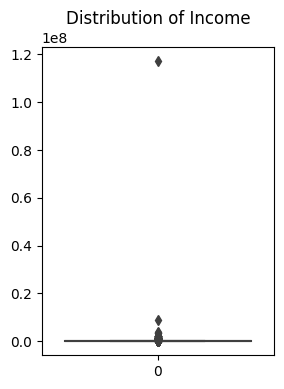

In [ ]:
plt.figure(figsize=(3,4))
sns.boxplot(ap_df.AMT_INCOME_TOTAL)
plt.title('Distribution of Income')
plt.show()

In [ ]:
ap_df.AMT_CREDIT.describe()

count    8.537500e+04
mean     5.987776e+05
std      4.016291e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.124465e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

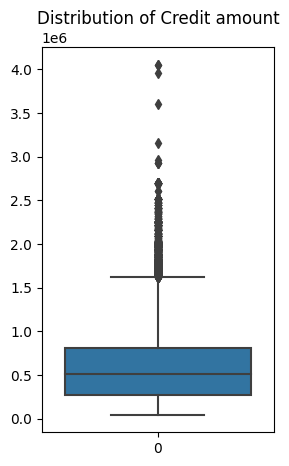

In [ ]:
plt.figure(figsize=(3,5))
sns.boxplot(ap_df.AMT_CREDIT)
plt.title('Distribution of Credit amount')
plt.show()

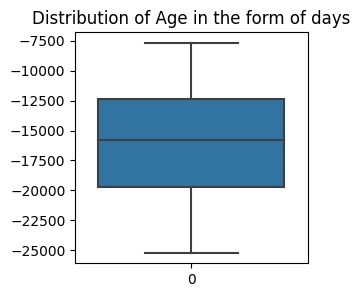

In [ ]:
plt.figure(figsize=(3,3))
sns.boxplot(ap_df.DAYS_BIRTH)
plt.title('Distribution of Age in the form of days')
plt.show()

Data Imbalance


In [ ]:
100*(ap_df.TARGET.value_counts())/ (len(ap_df))

0    91.941435
1     8.058565
Name: TARGET, dtype: float64

In [ ]:
targ_1 = ap_df[ap_df['TARGET']==1]
targ_0 = ap_df[ap_df['TARGET']==0]

In [ ]:
targ_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
targ_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
per_defaulters= round(100*len(targ_1)/(len(targ_0)+len(targ_1)),2)

per_nondefaulters=round(100*len(targ_0)/(len(targ_0)+len(targ_1)),2)

print('Count of target0_df:', len(targ_0))
print('Count of target1_df:', len(targ_1))


print('Percentage of people who paid their loan are: ', per_nondefaulters, '%' )
print('Percentage of people who did not paid their loan are: ', per_defaulters, '%' )

Count of target0_df: 78495
Count of target1_df: 6880
Percentage of people who paid their loan are:  91.94 %
Percentage of people who did not paid their loan are:  8.06 %


In [ ]:
imb_ratio = round(len(targ_0)/len(targ_1),2)
print('Imbalance Ratio:', imb_ratio)

Imbalance Ratio: 11.41


Univariate Analysis

In [ ]:
def uniplot(df,col,title,hue =None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 14
    plt.rcParams['axes.titlesize'] = 16
    plt.rcParams['axes.titlepad'] = 14


    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue)

    plt.show()

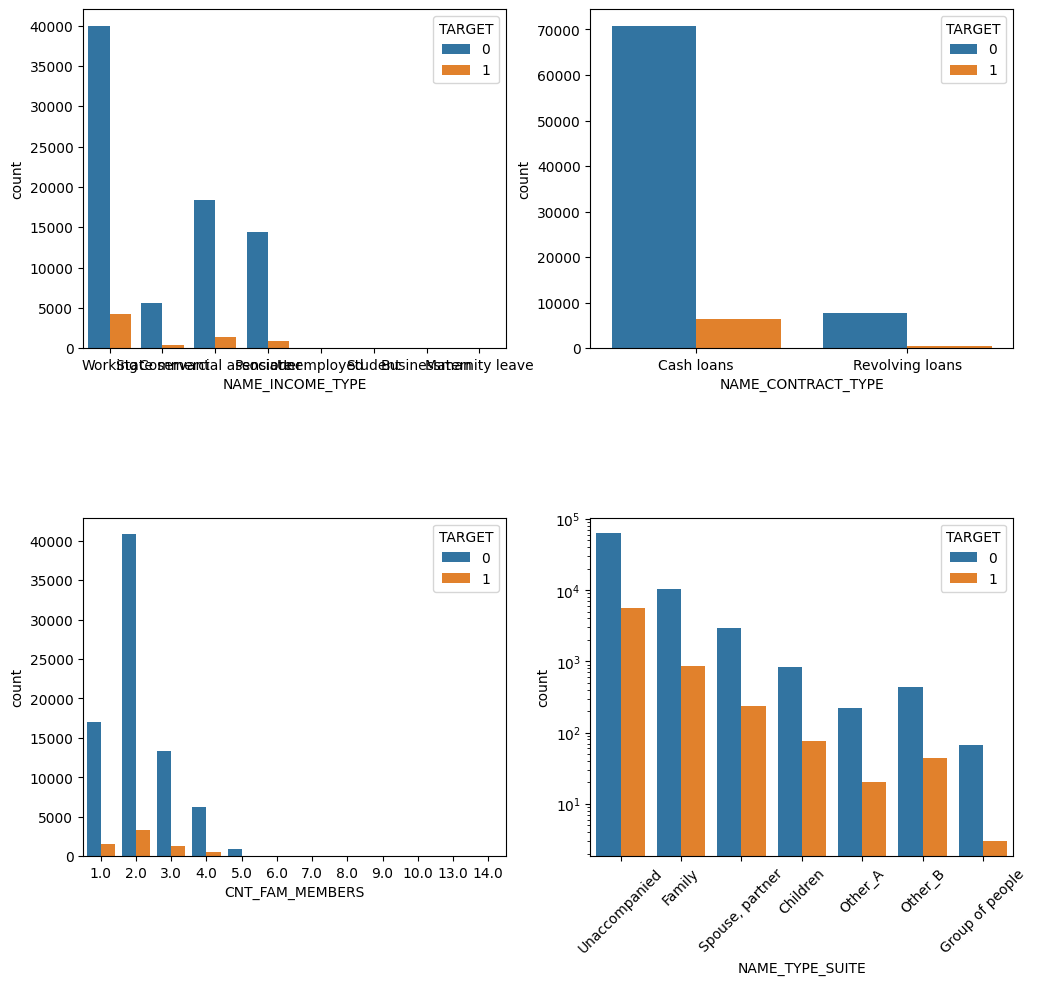

In [ ]:
features = ['NAME_INCOME_TYPE','NAME_CONTRACT_TYPE','CNT_FAM_MEMBERS','NAME_TYPE_SUITE']
plt.figure(figsize = (12, 11))

for i in enumerate(features):
    plt.subplot(2, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = i[1], hue = 'TARGET', data = ap_df)

plt.rcParams['axes.titlesize'] = 16
plt.xticks(rotation = 45)
plt.yscale('log')

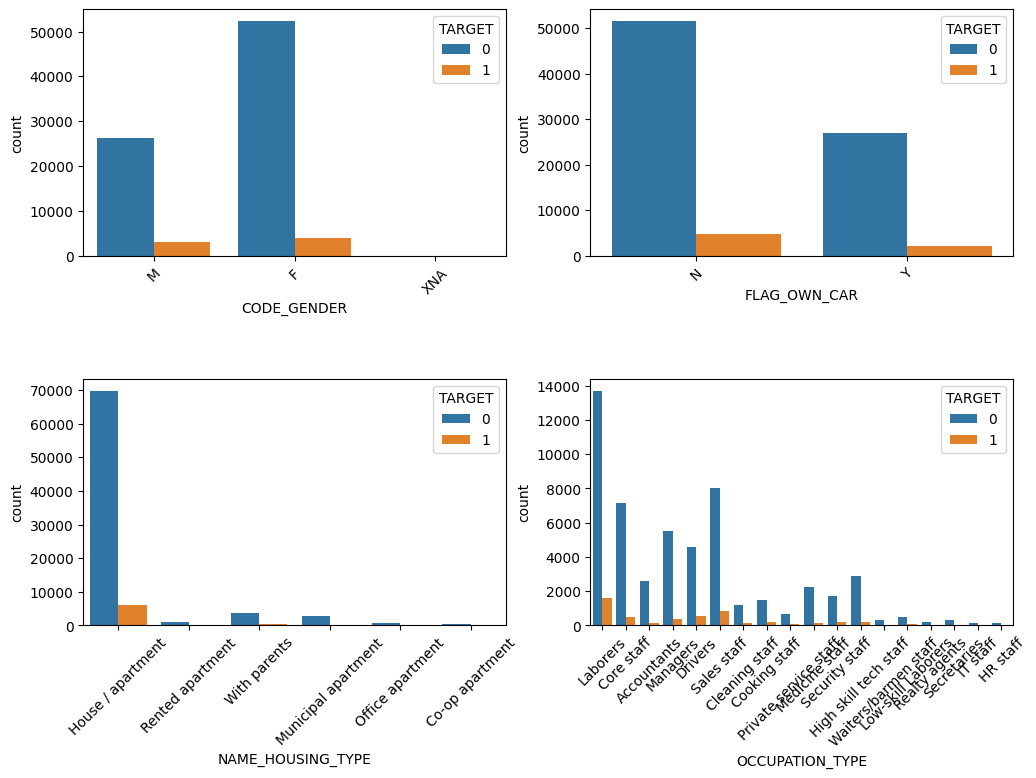

In [ ]:
features = ['CODE_GENDER','FLAG_OWN_CAR','NAME_HOUSING_TYPE','OCCUPATION_TYPE']
plt.figure(figsize = (12, 8))

for i in enumerate(features):
    plt.subplot(2, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = i[1], hue = 'TARGET', data = ap_df)

    plt.rcParams['axes.titlesize'] = 16
    plt.xticks(rotation = 45)

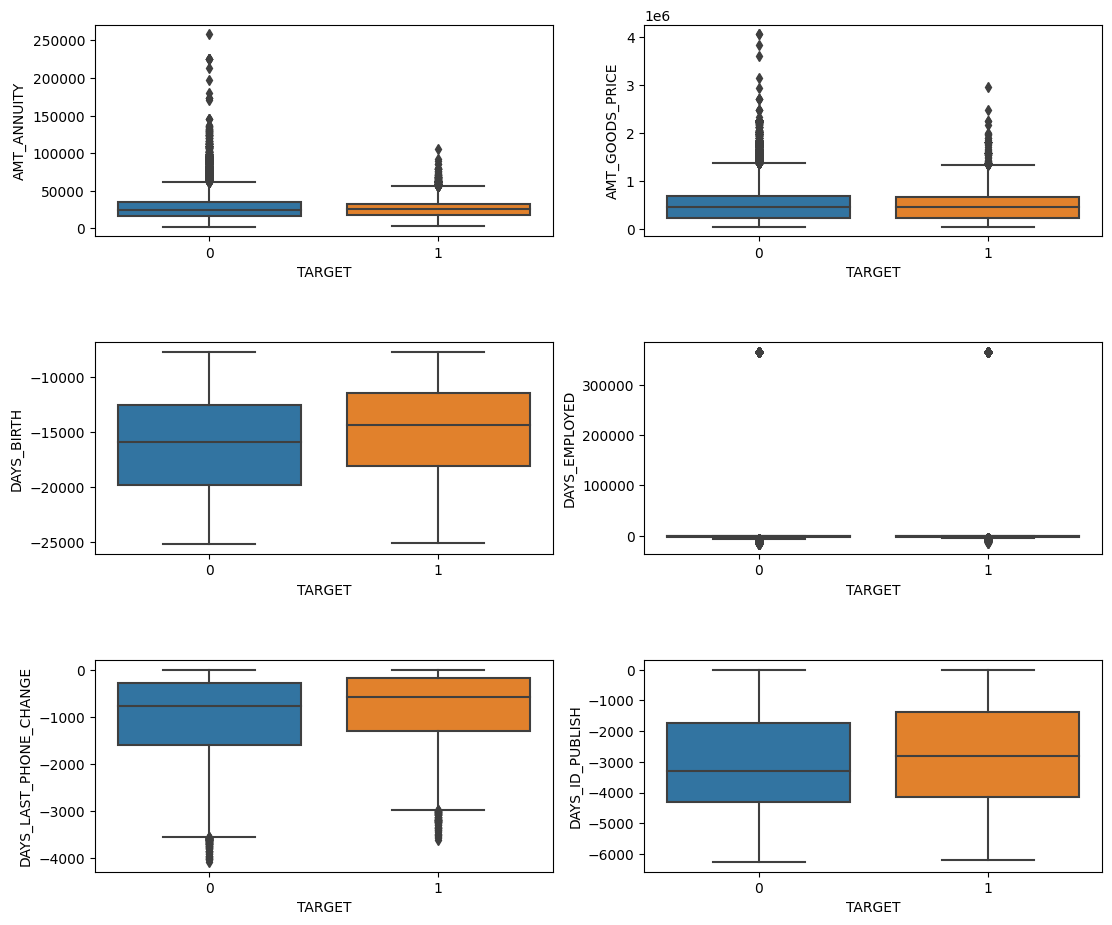

In [ ]:
features = ['AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH']
plt.figure(figsize = (13, 11))

for i in enumerate(features):
    plt.subplot(3, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(x = 'TARGET', y = i[1], data = ap_df)

Bivariate Analysis

Target 0


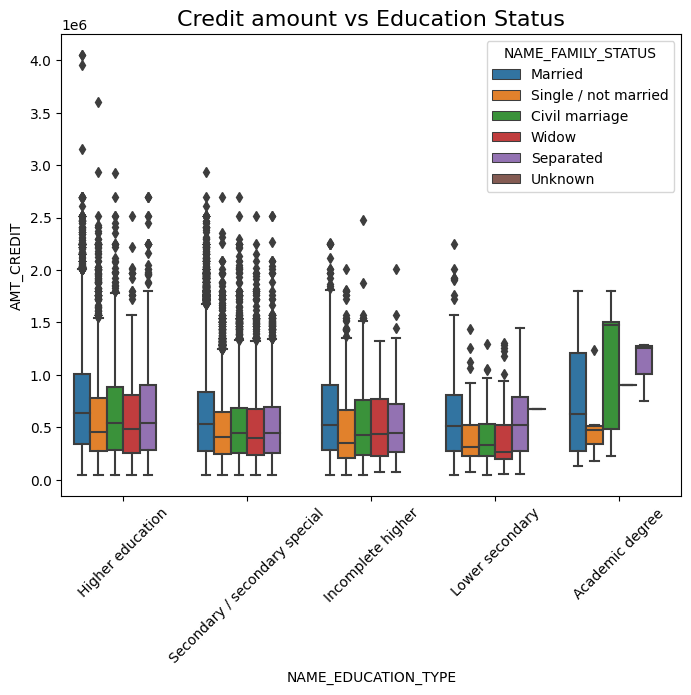

In [ ]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=45)
sns.boxplot(data =targ_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

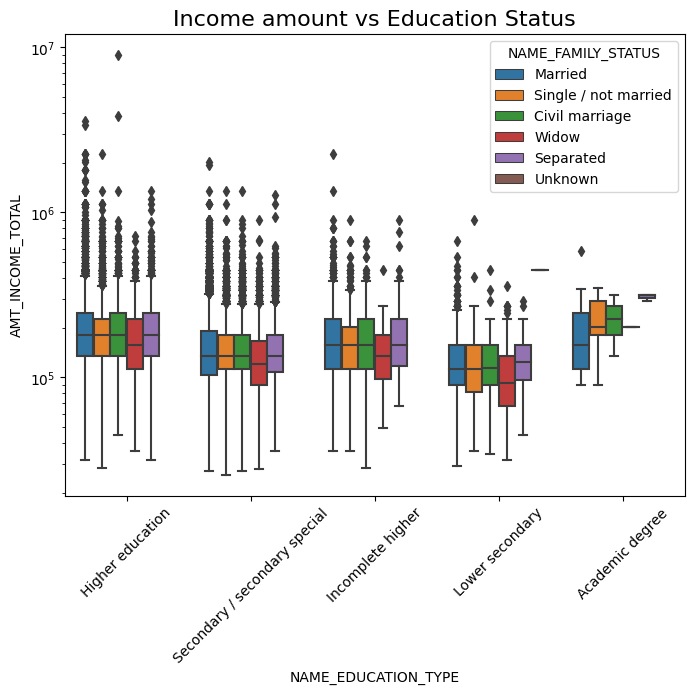

In [ ]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =targ_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

Target 1

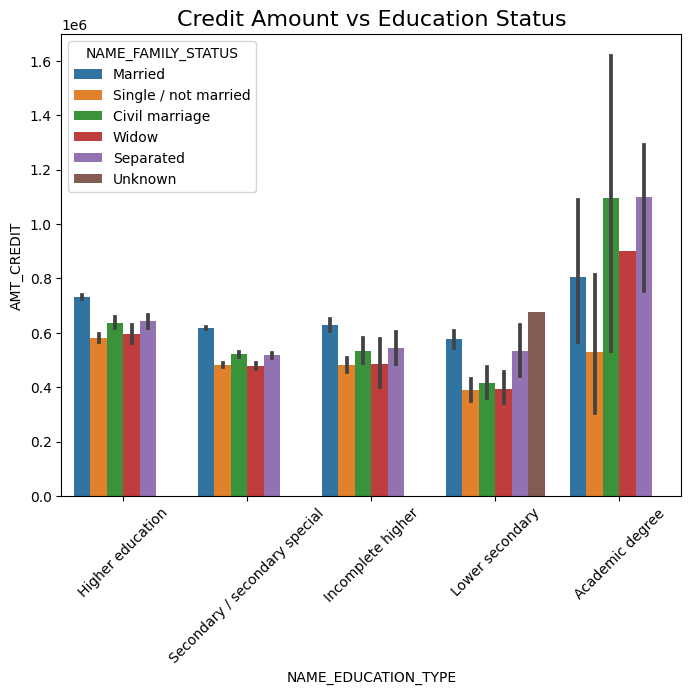

In [ ]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=45)
sns.barplot(data =targ_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

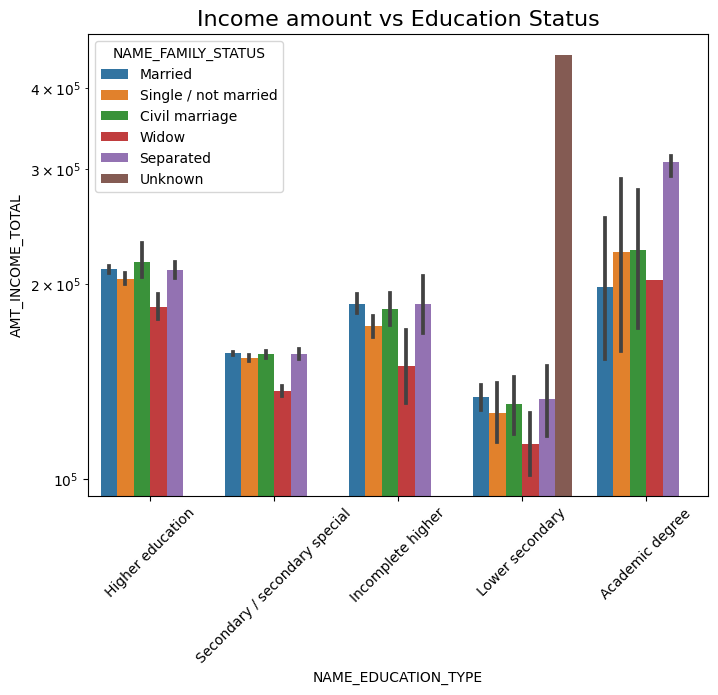

In [ ]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=45)
plt.yscale('log')
sns.barplot(data =targ_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

Inference



1.The number of female clients is almost double the number of male clients. Based on the percentage of defaulted credits, males have a higher chance of not returning their loans , comparing with women.

2.Majority of people live in House/apartment People living in office apartments have lowest default rate People living with parents and living in rented apartments have higher probability of defaulting.

3.In terms of percentage of not repayment of loan, Civil marriage has the highest percent of not repayment, with Widow the lowest (exception being Unknown).

4.Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree The Lower secondary category, although rare, have the largest rate of not returning the loan. The people with Academic degree have less than 2% defaulting rate.

5.The applicants with the type of income Maternity leave have almost 40% ratio of not returning loans, followed by Unemployed. The rest of types of incomes are under the average of 10% for not returning loans. Student and Businessmen, though less in numbers do not have any default record. Thus these two category are safest for providing loan.

6.Most of the loans are taken by Laborers, followed by Sales staff. IT staff take the lowest amount of loans. The category with highest percent of not repaid loans are Low-skill Laborers, followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff.

7.People who get loan for 300-600k tend to default more than others. Application with Income less than 300,000 has high probability of defaulting Applicant with Income more than 700,000 are less likely to default.

8.Having more family members increases the risk of defaulting.




Correlation


In [ ]:
corr = targ_0.corr()
corrdf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation
7141,FLOORSMAX_MEDI,FLOORSMAX_AVG,1.00
6392,APARTMENTS_MEDI,APARTMENTS_AVG,1.00
8237,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
6713,YEARS_BUILD_MEDI,YEARS_BUILD_AVG,1.00
1493,FLAG_EMP_PHONE,DAYS_EMPLOYED,1.00
6927,ELEVATORS_MEDI,ELEVATORS_AVG,1.00
7462,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_AVG,1.00
7034,ENTRANCES_MEDI,ENTRANCES_AVG,1.00
7248,FLOORSMIN_MEDI,FLOORSMIN_AVG,1.00
7262,FLOORSMIN_MEDI,FLOORSMIN_MODE,0.99


In [ ]:
corr = targ_1.corr()
corrdf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation
7676,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_AVG,1.0
6713,YEARS_BUILD_MEDI,YEARS_BUILD_AVG,1.0
6192,NONLIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_AVG,1.0
7462,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_AVG,1.0
7141,FLOORSMAX_MEDI,FLOORSMAX_AVG,1.0
7690,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,1.0
6834,COMMONAREA_MEDI,COMMONAREA_MODE,1.0
6820,COMMONAREA_MEDI,COMMONAREA_AVG,1.0
7248,FLOORSMIN_MEDI,FLOORSMIN_AVG,1.0
8237,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.0


In [ ]:
ap_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [ ]:
# Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation
cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


Repayer_df = ap_df.loc[ap_df['TARGET']==0, cols_for_correlation]
Defaulter_df = ap_df.loc[ap_df['TARGET']==1, cols_for_correlation]

In [ ]:
corr_repayer = Repayer_df.corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool))
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs()
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_repayer.head(10)

,VAR1,VAR2,Correlation
122,AMT_GOODS_PRICE,AMT_CREDIT,0.987255
371,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.951948
300,CNT_FAM_MEMBERS,CNT_CHILDREN,0.879038
495,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.860093
588,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.826333
123,AMT_GOODS_PRICE,AMT_ANNUITY,0.779189
92,AMT_ANNUITY,AMT_CREDIT,0.773861
216,DAYS_EMPLOYED,DAYS_BIRTH,0.615854
335,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,0.541192
365,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,0.539398


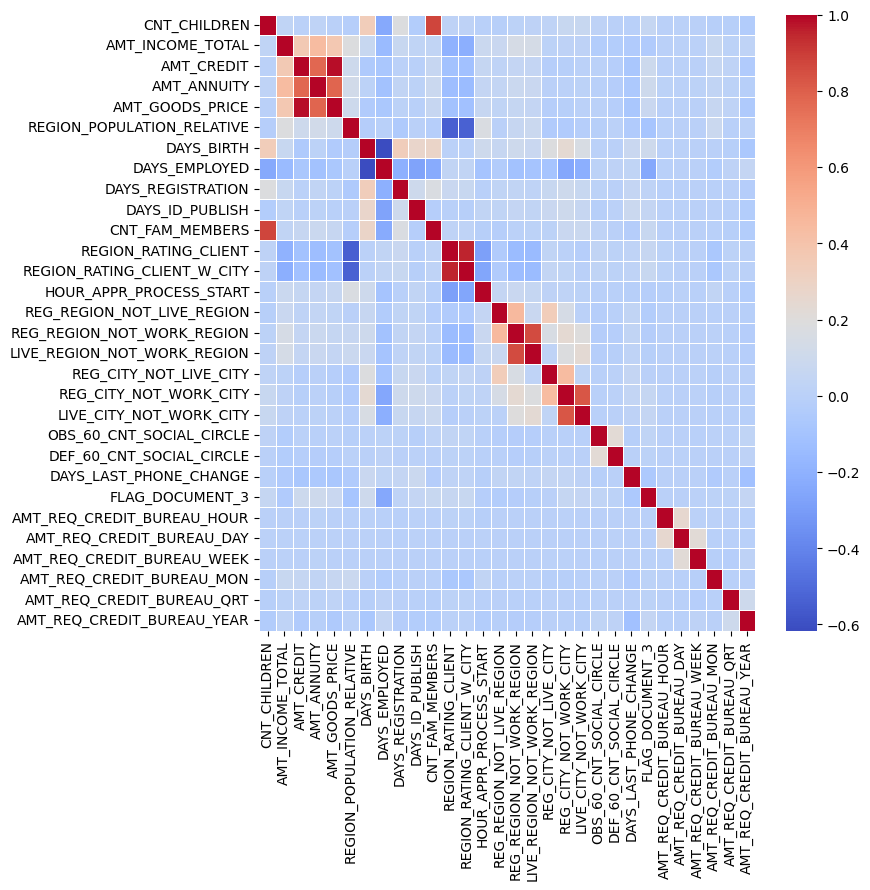

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Repayer_df.corr(), cmap="coolwarm",annot=False,linewidth =0.5)

In [ ]:
corr_Defaulter = Defaulter_df.corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(np.bool))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter["Correlation"]=corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head(10)

,VAR1,VAR2,Correlation
122,AMT_GOODS_PRICE,AMT_CREDIT,0.982047
371,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.945300
300,CNT_FAM_MEMBERS,CNT_CHILDREN,0.886837
495,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.829263
588,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.787258
92,AMT_ANNUITY,AMT_CREDIT,0.752907
123,AMT_GOODS_PRICE,AMT_ANNUITY,0.752631
216,DAYS_EMPLOYED,DAYS_BIRTH,0.584175
464,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.520767
557,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,0.467753


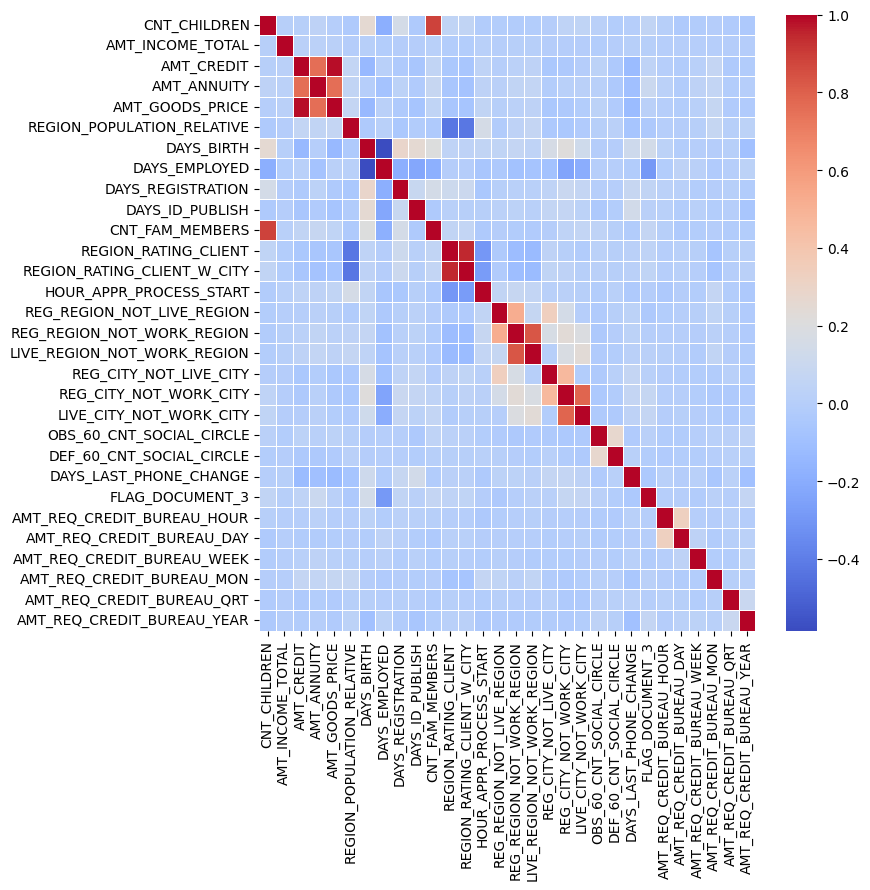

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Defaulter_df.corr(), cmap="coolwarm",annot=False,linewidth =0.5)

Inferences

Correlating factors amongst repayers: Credit amount is highly correlated with

1. loan annuity

2. total income

3. amount of goods price

We can also see that repayers have high correlation in number of days employed.




Correlating factors amongst Defaulters:

1. The loan annuity correlation with credit amount has slightly reduced in defaulters when compared to repayers.

2. We can also see that repayers have high correlation in number of days employed when compared to defaulters.

3. There is a severe drop in the correlation between total income of the client and the credit amount amongst defaulters whereas it is 0.342 among repayers.

4. Days_birth and number of children correlation has reduced to 0.259 in defaulters when compared to 0.337 in repayers.

5. There is a slight increase in defaulted to observed count in social circle among defaulters when compared to repayers

